# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

#TV, radio, newspaper
X = data.iloc[:, :-1] 

#sales
y = data.iloc[:, -1] 

feature_cols = data.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)

#MSE
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))
print ('MSE na testu: ', mean_squared_error(y_test, y_test_predicted))
#modeli s dobrim generalizacijskim sposobnostima imaju manji iznos srednje kvadratne pogreške na testnim podacima



MSE na treningu:  2.4793551789057866
MSE na testu:  3.79679723671522


Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [ ]:
# y = β0 + β1x1 + β2x2 + ⋯ + βdxd

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

0.04405928095746522 * TV + 
0.19928749689893954 * radio + 
0.006882452222275487 * newspaper + 
2.7089490925159065


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

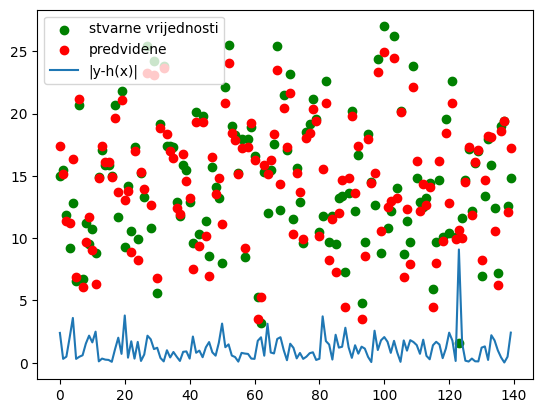

In [ ]:
X_train_tr=np.arange(0,len(X_train),1)
diff = np.abs(y_train - y_train_predicted)

plt.scatter(X_train_tr, y_train, c='g', label='stvarne vrijednosti')
plt.scatter(X_train_tr, y_train_predicted, c='r', label='predvidene')

plt.plot(X_train_tr, diff, label='|y-h(x)|')
plt.legend()
plt.show()

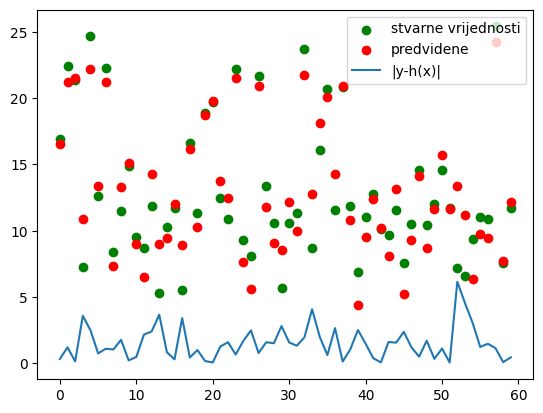

In [ ]:
#za testne vrijednosti
X_test_new =np.arange(0,len(X_test),1)
diff = np.abs(y_test - y_test_predicted)

plt.scatter(X_test_new, y_test, c='g', label='stvarne vrijednosti')
plt.scatter(X_test_new, y_test_predicted, c='r', label='predvidene')

plt.plot(X_test_new, diff, label='|y-h(x)|')
plt.legend()
plt.show()

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 5, 10]
train=[]
test=[]


for degree in degrees:
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model = LinearRegression().fit(X_train_poly, y_train)

  y_train_predicted = model.predict(X_train_poly)
  train_mse = mean_squared_error(y_train, y_train_predicted)
  train.append(train_mse)

  y_test_predicted = model.predict(X_test_poly)
  test_mse = mean_squared_error(y_test, y_test_predicted)
  test.append(test_mse)

  print("Stupanj ", degree)
  print("MSE trening: ", train_mse)
  print("MSE test: ", test_mse)
  print()

Stupanj  2
MSE trening:  0.3541097754193407
MSE test:  0.52319449490555

Stupanj  3
MSE trening:  0.21984452631177456
MSE test:  0.29077449152735363

Stupanj  5
MSE trening:  0.059449198112764494
MSE test:  35.36382965412483

Stupanj  10
MSE trening:  0.02936025392931409
MSE test:  149012020595.70538



_______________________________________________________________________
Kod 2. stupnja polinoma vrijednost MSE-a je bila manja (pogreška je bila manja) za trening podatke, a malo veća za test podatke. Kod 3.stupnja smanjile su se obje vrijednosti dok se kod 4.stupnja rezidual se drastično povećao za testne podatke, a smanjio za trening podatke što nam govori da je došlo do overfittinga. Ista stvar je i kod 10. stupnja.
_______________________________________________________________________  

Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram. 

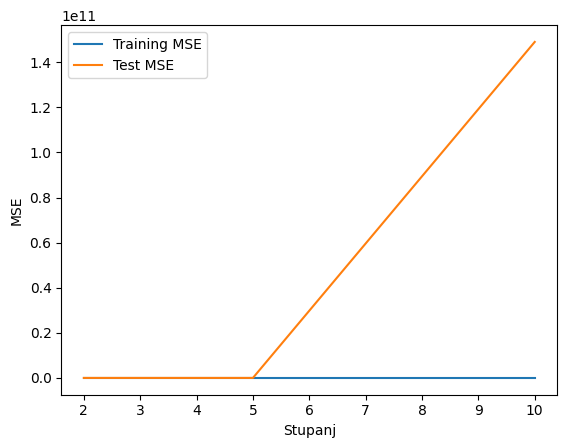

In [ ]:
plt.plot(degrees, train, label='Training MSE')
plt.plot(degrees, test, label='Test MSE')

plt.xlabel('Stupanj')
plt.ylabel('MSE')
plt.legend()
plt.show()

________________________________________________________________________
Gledajući graf može se zaključiti da je sve od 5. stupnja, uključujući njega, prenaučen model na trening podacima jer je MSE od testnih podataka sve veći povećanjem stupnja polinoma.
________________________________________________________________________

Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.

Stupanj  2
MSE trening:  0.8476116596934253
MSE test:  1.007630507076708

Stupanj  3
MSE trening:  0.8282466554598642
MSE test:  1.1532864903357123

Stupanj  5
MSE trening:  0.8282466554598642
MSE test:  1.1532864903357123

Stupanj  10
MSE trening:  0.8282466554598642
MSE test:  1.1532864903357123



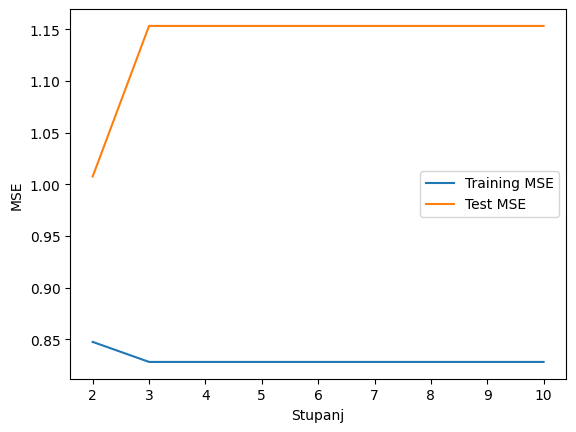

In [ ]:
train_im=[]
test_im=[]

#interaction_only:bool, default=False
#If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:
#included: x[0], x[1], x[0] * x[1], etc.
#excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.

for degree in degrees:
  poly = PolynomialFeatures(degree=degree,interaction_only=True)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model = LinearRegression().fit(X_train_poly, y_train)

  y_train_predicted = model.predict(X_train_poly)
  train_mse = mean_squared_error(y_train, y_train_predicted)
  train_im.append(train_mse)

  y_test_predicted = model.predict(X_test_poly)
  test_mse = mean_squared_error(y_test, y_test_predicted)
  test_im.append(test_mse)

  print("Stupanj ", degree)
  print("MSE trening: ", train_mse)
  print("MSE test: ", test_mse)
  print()


plt.plot(degrees, train_im, label='Training MSE')
plt.plot(degrees, test_im, label='Test MSE')
plt.xlabel('Stupanj')
plt.ylabel('MSE')
plt.legend()
plt.show()

_____________________________________________________________________
**Stupanj  2** (prije | poslije)

MSE trening:  0.3541097754193407 | 0.8476116596934253

MSE test:  0.52319449490555 | 1.007630507076708

**Stupanj  3**

MSE trening:  0.21984452631177456 | 0.8282466554598642

MSE test:  0.29077449152735363 | 1.1532864903357123

**Stupanj  5**

MSE trening:  0.059449198112764494 | 0.8282466554598642

MSE test:  35.36382965412483 | 1.1532864903357123

**Stupanj  10**

MSE trening:  0.02936025392931409 | 0.8282466554598642

MSE test:  149012020595.70538 | 1.1532864903357123


Poboljšale su se vrijednost dodavanjem interakcijskog člana. Ujednačile su se .
___________________________________________________________________



Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

__________________________________________________________________________
Najbolje performanse na podskupu za trening ima model 5. stupnja, a na testu 3.stupnja. Za problem je prikladnija polinomijalna regresija. Interakcijski članovi su ujednačili razliku između trening i test podataka.
_________________________________________________________________________

## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

___________________________________________________________________
Prva 3 okvira s kodom nisu ono što mi treba. Nakon njih je riješeno kako treba.
___________________________________________________________________

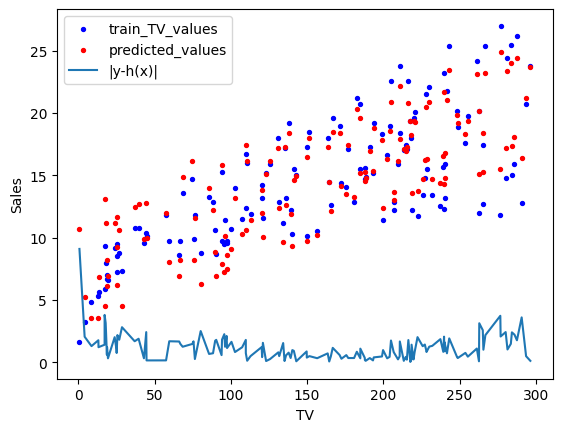

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

sorted_inds = np.argsort(X_train['TV'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['TV'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)

# tv_values = X_train.iloc[:,1]
# X_train_tv = X_train.iloc[tv_values]
# y_train = y_train
X_train_tv = X_train['TV'].values


# test_tv_values = X_test.iloc[:,1]
# X_test_tv = X_test.iloc[test_tv_values]
# y_test = y_test
X_test_tv = X_test['TV'].values


#Svaki puta isti
y_train_predicted = model.predict(X_train)
diff = np.abs(y_train - y_train_predicted)

plt.scatter (x = X_train_tv, y= y_train, color= 'b', s=8, label='train_TV_values')
plt.scatter (x = X_train_tv, y= y_train_predicted, color= 'r', s=8, label='predicted_values')

# plt.scatter (x = X_test_tv, y= y_test, color= 'r', s=8, label='test_TV_value')

plt.plot(X_train_tv, diff, label='|y-h(x)|')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show ()

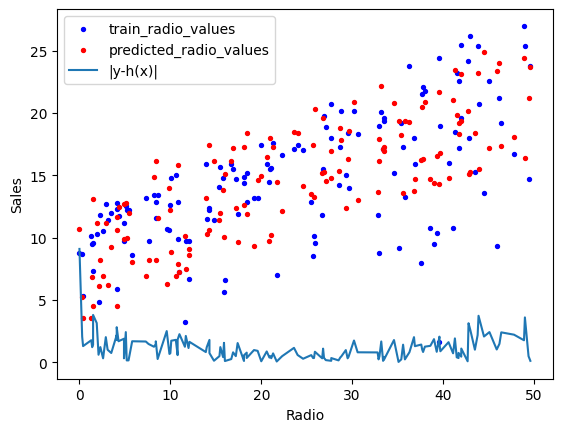

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

sorted_inds = np.argsort(X_train['radio'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['radio'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)


X_train_radio = X_train['radio'].values
X_test_radio = X_test['radio'].values

plt.scatter (x = X_train_radio, y= y_train, color= 'b', s=8, label='train_radio_values')
plt.scatter (x = X_train_radio, y= y_train_predicted, color= 'r', s=8, label='predicted_radio_values')

#plt.scatter (x = X_test_tv, y= y_test, color= 'r', s=8, label='test_TV_value')

plt.plot(X_train_radio, diff, label='|y-h(x)|')

plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show ()


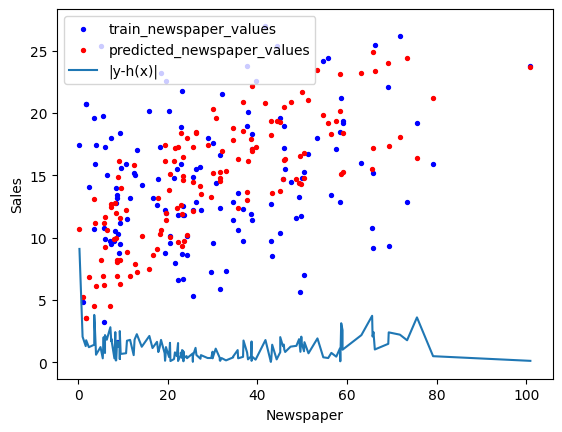

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

sorted_inds = np.argsort(X_train['newspaper'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['newspaper'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)


X_train_newspaper = X_train['newspaper'].values
X_test_newspaper = X_test['newspaper'].values

plt.scatter (x = X_train_newspaper, y= y_train, color= 'b', s=8, label='train_newspaper_values')
plt.scatter (x = X_train_newspaper, y= y_train_predicted, color= 'r', s=8, label='predicted_newspaper_values')

#plt.scatter (x = X_test_newspaper, y= y_test, color= 'r', s=8, label='test_newspaper_value')

plt.plot(X_train_newspaper, diff, label='|y-h(x)|')

plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

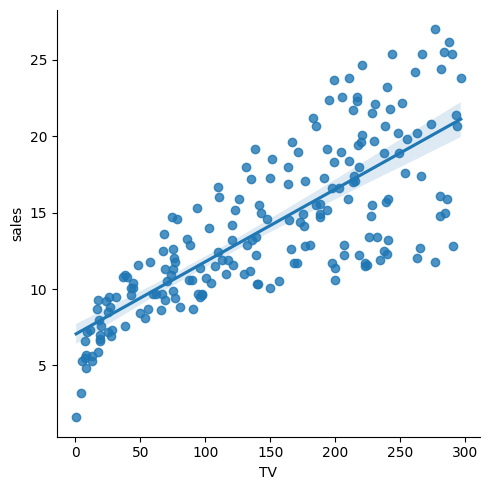

In [ ]:
#OVO je dobro
import pandas as pd
import seaborn as sns
from statsmodels.stats import diagnostic

sns.lmplot(x='TV', y='sales', data=data)

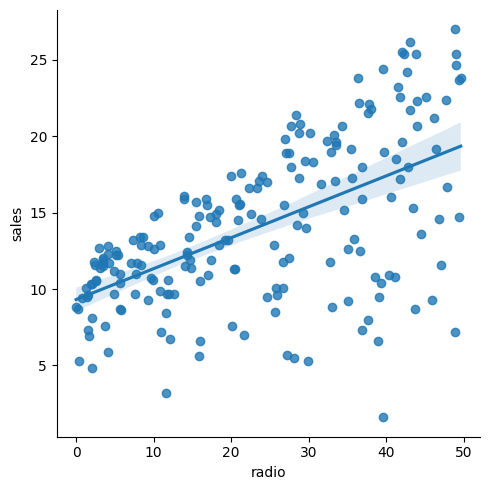

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.stats import diagnostic

sns.lmplot(x='radio', y='sales', data=data)

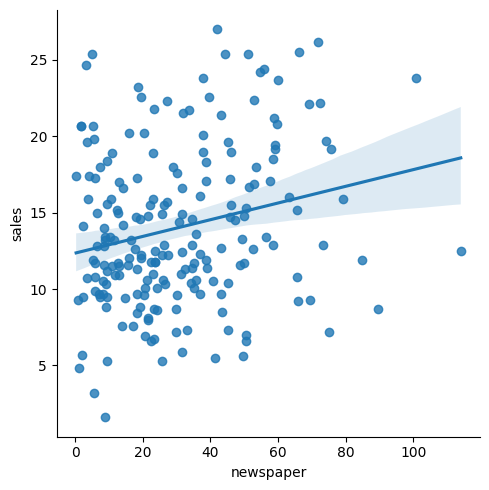

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.stats import diagnostic

	
sns.lmplot(x='newspaper', y='sales', data=data)

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

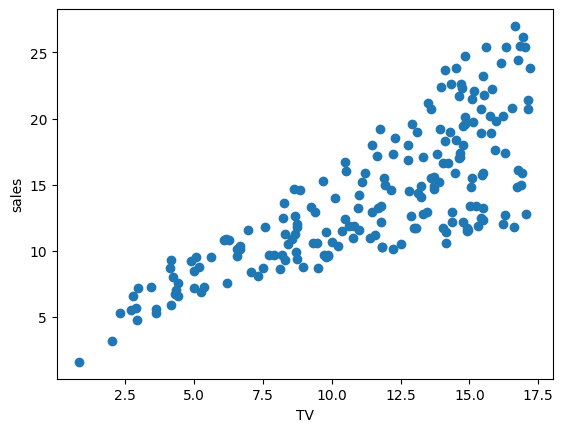

In [ ]:
#korijen
x=data['TV']**(1/2)  
plt.scatter(x, data['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()


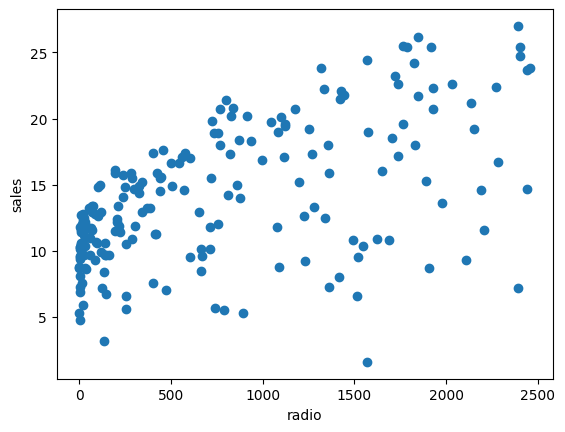

In [ ]:
#NIJE DOBAR MODEL KAD SE KORIJENUJE 
# x=data['radio']**(1/2)
# plt.scatter(x, data['sales'])
# plt.xlabel('radio')
# plt.ylabel('sales')
# plt.show()

#KVADRATNI JE NAJBOLJI
x=data['radio']**2
plt.scatter(x, data['sales'])
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()

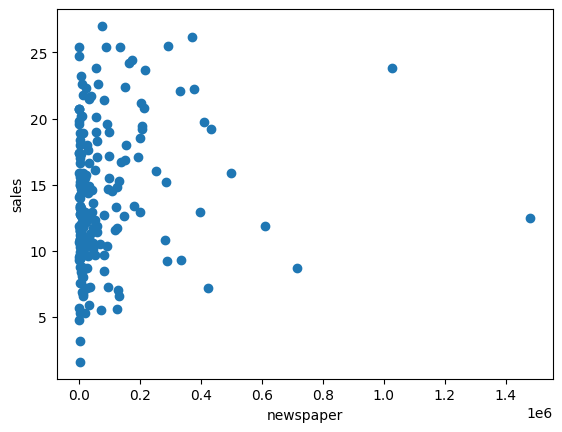

In [ ]:
#NIŠTA MU NE POMAŽE KAKO BI POSTAO LINEARNIJI
x=data['newspaper']**(3)
plt.scatter(x, data['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

In [ ]:
X_train['TV']=X_train['TV']**(1/2)
X_train['radio']=X_train['radio']**(2)
X_train['newspaper']=X_train['newspaper']**(3)

X_test['TV']=X_test['TV']**(1/2)
X_test['radio']=X_test['radio']**(2)
X_test['newspaper']=X_test['newspaper']**(3)

model_tv = LinearRegression().fit(X_train, y_train)

y_train_pr_tv = model_tv.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_pr_tv))

y_test_pr_tv = model_tv.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_pr_tv))

MSE na treningu:  24.221084816928183
MSE na testu: 27.58148470068161


Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

_____________________________________________________________________________
MSE je puno veći nego li primjenom linearne i nelinearne regresije bez preslikavanja u prostor značajki jer se ovim postupkom kubiraju, kvadriraju i sl. značajke. Pozitivno je što je razlika između MSE-a za trening i test mala.
____________________________________________________________________________

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

linearModel = LinearRegression().fit(X_train, y_train)

y_train_predicted = linearModel.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = linearModel.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))



MSE na treningu:  2.4793551789057866
MSE na testu: 3.79679723671522


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


poly_features = PolynomialFeatures(3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


ridge = Ridge(alpha=1)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE Ridge:", mse_ridge)


MSE Ridge: 0.2907588937720193


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11012e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=3)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Lasso model:")
print("MSE:", mse_lasso)

Lasso model:
MSE: 0.48529912273874687


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.251e+01, tolerance: 3.674e-01
  model = cd_fast.enet_coordinate_descent(


Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

_________________________________________________________________________
MSE za regularizaciju podataka s L2-regularizacija(ridge) dobije se 0.2908,a s L1-regularizacija (lasso) dobije se 0.4853.
_________________________________________________________________________

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse_svr=mean_squared_error(y_test, y_pred)
print("MSE", mse_svr )
print("RMSE", np.sqrt(mse_svr))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 4.329839036315111
RMSE 2.08082652720382
MAE 1.4817429625437224


In [ ]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

mse_dtr=mean_squared_error(y_test, y_pred)
print("MSE", mse_dtr )
print("RMSE", np.sqrt(mse_dtr))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 1.6883333333333348
RMSE 1.299358816237199
MAE 1.0100000000000005


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)

mse_knr=mean_squared_error(y_test, y_pred)
print("MSE", mse_knr )
print("RMSE", np.sqrt(mse_knr))
print("MAE", mean_absolute_error(y_test, y_pred))


MSE 2.523600000000001
RMSE 1.5885842753848476
MAE 1.178666666666667
